In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
data_path = "/kaggle/input/live-csv/Live (1).csv"

In [43]:
data = pd.read_csv(data_path)

In [44]:
data.dtypes

num_reactions         float64
num_comments          float64
num_shares            float64
num_likes             float64
num_loves             float64
num_wows              float64
num_hahas             float64
num_sads              float64
num_angrys            float64
status_type_link      float64
status_type_photo     float64
status_type_status    float64
status_type_video     float64
dtype: object

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,0.048857,0.098222,0.0,0.003609,0.012633,0.046497,1.0
num_comments,7050.0,0.010689,0.042384,0.0,0.000000,0.000191,0.001096,1.0
num_shares,7050.0,0.011689,0.038435,0.0,0.000000,0.000000,0.001168,1.0
num_likes,7050.0,0.045657,0.095429,0.0,0.003609,0.012314,0.039225,1.0
num_loves,7050.0,0.019374,0.060842,0.0,0.000000,0.000000,0.004566,1.0
num_wows,7050.0,0.004638,0.031366,0.0,0.000000,0.000000,0.000000,1.0
num_hahas,7050.0,0.004436,0.025205,0.0,0.000000,0.000000,0.000000,1.0
num_sads,7050.0,0.004778,0.031317,0.0,0.000000,0.000000,0.000000,1.0
num_angrys,7050.0,0.003651,0.023446,0.0,0.000000,0.000000,0.000000,1.0
status_type_link,7050.0,0.008936,0.094115,0.0,0.000000,0.000000,0.000000,1.0


In [46]:
model = KMeans(n_clusters=3)

In [47]:
model.fit(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [48]:
labels = model.predict(data)

In [49]:
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([2334, 4288,  428]))

In [50]:
silhouettes = []
ks = list(range(2,12))

In [51]:
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster, n_init=10).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric="euclidean")
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822
For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883
For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088
For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754
For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796
For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257
For n_clusters=8, The Silhouette Coefficient is 0.8369757672176514
For n_clusters=9, The Silhouette Coefficient is 0.7609925233000441
For n_clusters=10, The Silhouette Coefficient is 0.7271859359299717
For n_clusters=11, The Silhouette Coefficient is 0.7185301027185709


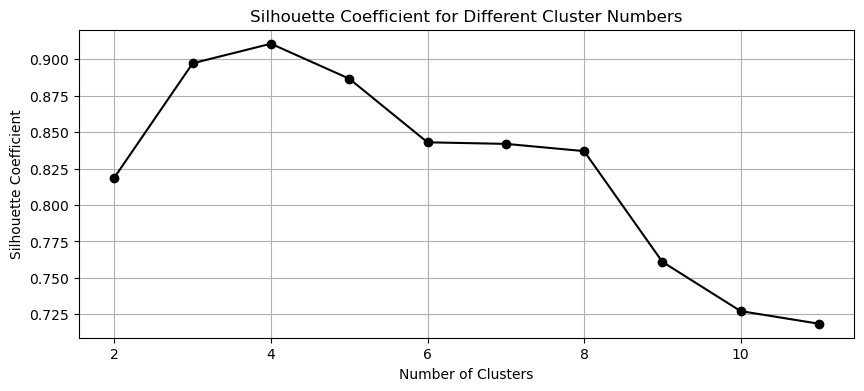

In [81]:
plt.figure(figsize=(10, 4))
plt.plot(ks, silhouettes, marker='o', c="k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient for Different Cluster Numbers")
plt.grid(True)

In [87]:
model = KMeans(n_clusters=4, n_init=10)

In [88]:
model.fit(data)

KMeans(n_clusters=4, n_init=10)

In [90]:
labels = model.predict(data)

In [91]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([4288, 2334,  365,   63]))

In [98]:
data["labels"] = labels
data["labels"].value_counts()

0    4288
1    2334
2     365
3      63
Name: labels, dtype: int64